In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

# Fast Fourier Transform 2D

In [2]:
# Nome do arquivo de imagem
img_name = 'examples/2560x1440.jpg'

# Carregando a imagem com PIL
img = Image.open(img_name)

# Convertendo a imagem para escala de cinza
img_gray = img.convert("L")

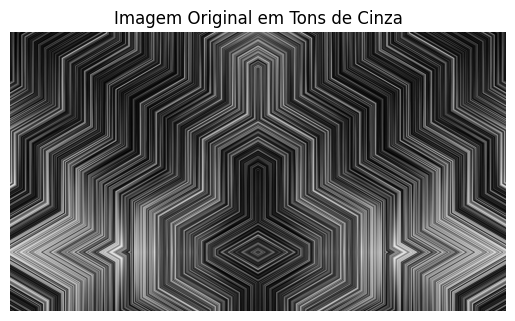

In [3]:
# Plotando a imagem em tons de cinza
plt.imshow(img_gray, cmap="gray")
plt.title("Imagem Original em Tons de Cinza")
plt.axis('off')

plt.show()

In [4]:
import numpy as np
import cmath

def stockham_fft(signal):
    N = len(signal)

    stages = int(np.log2(N))

    src = signal.copy()
    dst = np.zeros(N, dtype=complex)

    for stage in range(stages):
        m = 2 ** (stage + 1)

        half_m = m // 2

        for idx in range(N // 2):
            src_idx_l = idx
            src_idx_r = idx + N // 2

            group = idx // half_m

            j = idx % half_m

            w = cmath.exp(-2j * cmath.pi * j / m)

            dst[group*m + j] = src[src_idx_l] + w * src[src_idx_r]
            dst[group*m + j + half_m] =  src[src_idx_l] - w * src[src_idx_r]

        src, dst = dst, src

    return src

def stockham_ifft(signal):
    N = len(signal)
    stages = int(np.log2(N))

    src = signal.copy()
    dst = np.zeros(N, dtype=complex)

    for stage in range(stages):
        m = 2 ** (stage + 1)
        half_m = m // 2

        for idx in range(N // 2):
            src_idx_l = idx
            src_idx_r = idx + N // 2

            group = idx // half_m
            j = idx % half_m

            w = cmath.exp(+2j * cmath.pi * j / m)

            dst[group*m + j] = src[src_idx_l] + w * src[src_idx_r]
            dst[group*m + j + half_m] = src[src_idx_l] - w * src[src_idx_r]

        src, dst = dst, src

    return src / N

In [5]:
def fft2_stockham(matrix):
    temp = np.array([stockham_fft(row) for row in matrix])
    result = np.array([stockham_fft(col) for col in temp.T]).T
    return result

def ifft2_stockham(matrix):
    temp = np.array([stockham_ifft(row) for row in matrix])
    result = np.array([stockham_ifft(col) for col in temp.T]).T
    return result

In [6]:
def crop_center(arr, cropx, cropy):
    y, x = arr.shape
    startx = x // 2 - (cropx // 2)
    starty = y // 2 - (cropy // 2)
    return arr[starty:starty+cropy, startx:startx+cropx]

In [7]:
# Convertendo a imagem para um array NumPy
img_arr = np.array(img_gray, dtype=float)

imgs_arr = [crop_center(img_arr, size, size).astype(complex) for size in [128, 256, 512, 1024]]

In [8]:
# Realizando a Tranformada Rápida de Fourier (FFT)
fft_result = fft2_stockham(imgs_arr[2])

In [9]:
# Calculando o espectro de magnitude
magnitude_spectrum = 20 * np.log(np.abs(fft_result) + 1)

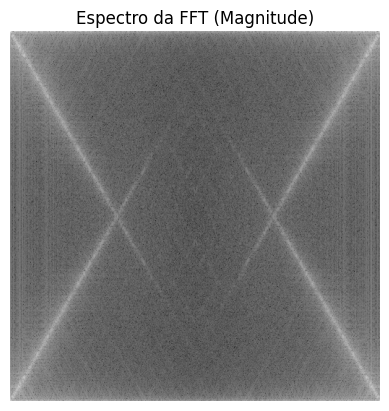

In [10]:
# Plotando o espectro de magnitude
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Espectro da FFT (Magnitude)")
plt.axis('off')

plt.show()

In [12]:
img_rec = ifft2_stockham(fft_result).real

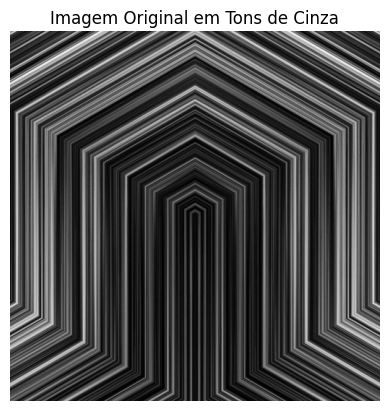

In [13]:
# Plotando a imagem em tons de cinza
plt.imshow(img_rec, cmap="gray")
plt.title("Imagem Original em Tons de Cinza")
plt.axis('off')

plt.show()

# Banchmark

In [14]:
import time

def fft_exec_time(array):
    start = time.time()
    fft2_stockham(array)
    return time.time() - start

In [15]:
fft_times = [fft_exec_time(img) * 1000 for img in imgs_arr]

fft_times = np.array(fft_times)

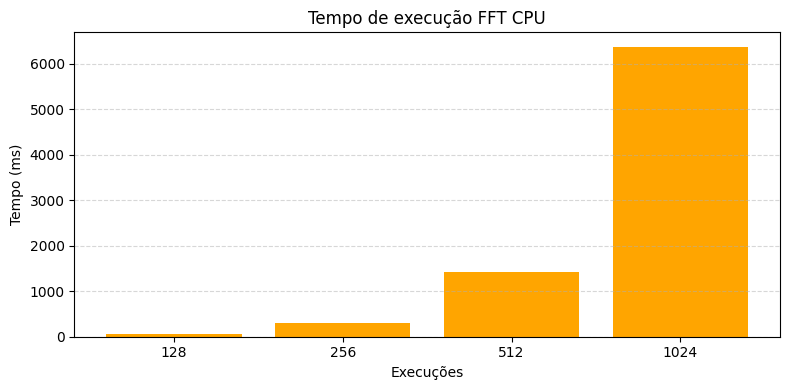

In [16]:
labels = [f"Medida {i}" for i in range(len(fft_times))]

plt.figure(figsize=(8, 4))
plt.bar(["128", "256", "512", "1024"], fft_times, color='orange')
plt.xlabel("Execuções")
plt.ylabel("Tempo (ms)")
plt.title("Tempo de execução FFT CPU")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("banchmark/fft_cpu.png")
plt.show()